# Building a CNN model to detect closed eyes 

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
#to get training and test data
from sklearn.model_selection import train_test_split
# to work on images 
from PIL import Image

### Step 1 : Getting and Splitting the data

In [13]:
# Path to the image folder -----------------------------------change this accordingly 
image_folder = "T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\image_data_processed_rgb"

<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\toshi\AppData\Local\Temp\ipykernel_24072\1899367845.py:2: SyntaxWarning: invalid escape sequence '\T'
  image_folder = "T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\image_data_processed_rgb"


In [14]:
#loading the data into numpy array 
image_list = []
label_list = []

#class_names = os.listdir(image_folder) #names of the subfolder
class_names=["Open","Closed"]#we know our data

for class_name in class_names:
    class_path=os.path.join(image_folder, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = Image.open(img_path)
            img_array = np.array(img)
            image_list.append(img_array)

            if class_name == 'Open':
                label_list.append(1)#1 if open else 0 
            else:
                label_list.append(0)
        except Exception as e:
            print(f"Failed to load {img_path}: {e}")

# Convert to NumPy arrays
images = np.array(image_list)
labels = np.array(label_list)

print("Shape of images:", images.shape)
print("Shape of labels:", labels.shape)

Shape of images: (4356, 200, 200, 3)
Shape of labels: (4356,)


In [16]:
# creating a 70|15|15 training test and validation split 

# 15% split of test data
image_temp, image_test, label_temp, label_test = train_test_split(
    images, labels, test_size=0.15, random_state=45, stratify=labels
)

# 70 and 15 percent split of training and validation 0.1765=15/85  
image_train, image_val, label_train, label_val = train_test_split(
    image_temp, label_temp, test_size=0.1765, random_state=6, stratify=label_temp
)

print("no of images for training",len(image_train))
print("no of images for testing",len(image_test))
print("no of images for validation",len(image_val))
type(image_test)
image_test.shape

no of images for training 3048
no of images for testing 654
no of images for validation 654


(654, 200, 200, 3)

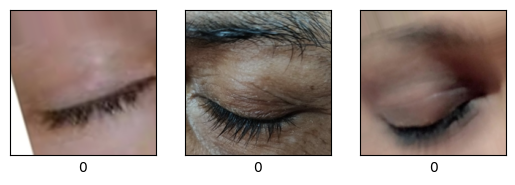

In [23]:
#plotting 3 images to inspect our data
#change here to plot image_val and image_test
plot_image=image_train
plot_label=label_train
import random
plt.figure()
image_pos=1
for i in range(3):
    index=random.randint(0,len(image_test))

    plt.subplot(1,3,image_pos)
    plt.imshow(plot_image[index])
    plt.xlabel(str(plot_label[index]))
    plt.xticks([])
    plt.yticks([])

    image_pos+=1
plt.show()

In [24]:
#scailing the image data to make it easier for our model to learn
image_train, image_test, image_val = image_train/255, image_test/255, image_val/255

In [25]:
import tensorflow as tf
base_model= tf.keras.applications.MobileNetV2(input_shape=(200,200,3),include_top=False,weights='imagenet')

#do not train this model
base_model.trainable = False

global_average_layer= tf.keras.layers.GlobalAveragePooling2D()
prediction_layer= tf.keras.layers.Dense(1,activation="sigmoid")#for binary classification 

C:\Users\toshi\AppData\Local\Temp\ipykernel_24072\1201496459.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model= tf.keras.applications.MobileNetV2(input_shape=(200,200,3),include_top=False,weights='imagenet')


In [26]:
#adding all the layers together
from tensorflow.keras import Model, Input

#Using the Functional API 

inputs = Input(shape=(200, 200, 3))  # or (200, 200, 1) if grayscale
x = base_model(inputs, training=False)
x = global_average_layer(x)
outputs = prediction_layer(x)

model = Model(inputs, outputs)

In [27]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
#implementing for early stopping
import tensorflow 
early_stopping=tensorflow.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [28]:
model_history = model.fit(
    image_train, label_train,
    validation_data=(image_val, label_val),  # use this instead of validation_split
    batch_size=16,
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 24s 104ms/step - accuracy: 0.8759 - loss: 0.2971 - val_accuracy: 0.9847 - val_loss: 0.0595
Epoch 2/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 95ms/step - accuracy: 0.9877 - loss: 0.0542 - val_accuracy: 0.9847 - val_loss: 0.0440
Epoch 3/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9870 - loss: 0.0455 - val_accuracy: 0.9908 - val_loss: 0.0342
Epoch 4/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 18s 94ms/step - accuracy: 0.9905 - loss: 0.0336 - val_accuracy: 0.9954 - val_loss: 0.0301
Epoch 5/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 17s 87ms/step - accuracy: 0.9950 - loss: 0.0240 - val_accuracy: 0.9954 - val_loss: 0.0273
Epoch 6/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 17s 89ms/step - accuracy: 0.9942 - loss: 0.0262 - val_accuracy: 0.9908 - val_loss: 0.0242
Epoch 7/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.9941 - loss: 0.0213 - val_accuracy: 0.9985 - val_loss: 0.0213
Epoch 8/100
191/191 ━━━━━━━━━━━━━━━━━━━━ 17s 90ms/step - accuracy: 0.9981 - loss: 

<>:10: SyntaxWarning: invalid escape sequence '\T'
<>:10: SyntaxWarning: invalid escape sequence '\T'
C:\Users\toshi\AppData\Local\Temp\ipykernel_24072\3316593518.py:10: SyntaxWarning: invalid escape sequence '\T'
  plt.savefig("T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\support_files\Accuracy_vs_epochs_rgb2.jpg", dpi=300, bbox_inches='tight')


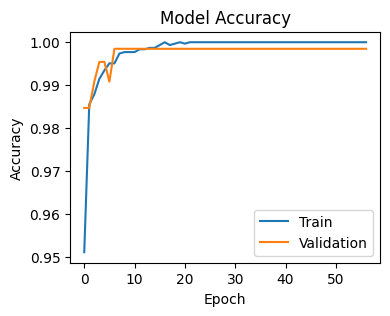

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train', 'Validation'], loc="lower right")

# Save before showing
plt.savefig("T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\support_files\Accuracy_vs_epochs_rgb.jpg", dpi=300, bbox_inches='tight')
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\T'
<>:9: SyntaxWarning: invalid escape sequence '\T'
C:\Users\toshi\AppData\Local\Temp\ipykernel_24072\1631501661.py:9: SyntaxWarning: invalid escape sequence '\T'
  plt.savefig("T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\support_files\loss_vs_epochs_rgb2.jpg", dpi=300, bbox_inches='tight')


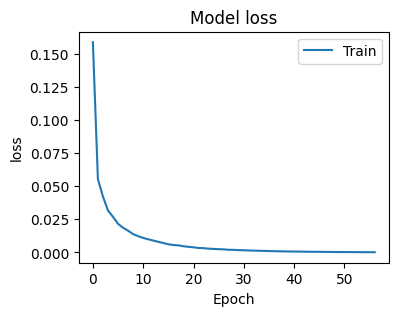

In [ ]:
plt.figure(figsize=(4, 3))
plt.plot(model_history.history["loss"])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(['Train'], loc="upper right")

# Save before showing
plt.savefig("T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\support_files\loss_vs_epochs_rgb.jpg", dpi=300, bbox_inches='tight')
plt.show()

In [31]:
from sklearn.metrics import accuracy_score

#testing with know values
image_predicted = model.predict(image_val)

# Convert predicted probabilities to class indices
predicted_classes = (image_predicted > 0.5).astype(int)

# Use the actual labels, not image data
true_classes = label_val 
# Now calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(true_classes, predicted_classes)
print("Accuracy:", score*100,"%")

21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step
Accuracy: 99.84709480122325 %


### Achieved an accuracy of 99.8% 

In [32]:
model.save(f"driver_drowsiness_MobileNetV2.keras")

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

#depending on whether you put flag_rgb as true in the file image_data_processing the way the functionhere is defined will change 

def predict_output(image_input, flag_rgb=True):
    model = load_model("T:/TOSHITH/PROGRAMMING/CNN-Project---Driver-Drowsiness-Detection/driver_drowsiness_MobileNetV2.keras")

    if not flag_rgb:
        image = Image.fromarray(image_input).convert("L")    # 1 channel
    else:
        image = Image.fromarray(image_input)

    image = image.resize((200, 200))
    image_array = img_to_array(image) / 255.0  # shape: (200, 200, 3) or (200, 200, 1)
    image_array = np.expand_dims(image_array, axis=0)       # shape: (1, 200, 200, x)

    prediction = model.predict(image_array)
    predicted_label = "Open" if prediction[0][0] > 0.5 else "Closed"

    plt.imshow(image, cmap="gray" if not flag_rgb else None)
    plt.title(f"Predicted Label: {predicted_label}")
    plt.axis("off")
    plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\T'
<>:5: SyntaxWarning: invalid escape sequence '\T'
C:\Users\toshi\AppData\Local\Temp\ipykernel_24072\2842745328.py:5: SyntaxWarning: invalid escape sequence '\T'
  img = Image.open("T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\support_files\closed_eye.jpg")  # grayscale


(195, 166, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 658ms/step


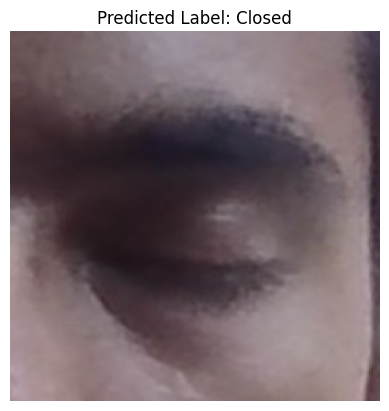

In [ ]:
from PIL import Image


img = Image.open("T:\TOSHITH\PROGRAMMING\CNN-Project---Driver-Drowsiness-Detection\support_files\closed_eye.jpg")  # grayscale

image_input=np.array(img)
print(np.shape(image_input))
predict_output(image_input,flag_rgb=True)